# Quantium Virtual Internship – Task 1
#### Data Preparation & Customer Analytics

In [1]:
# 1. Load Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re

plt.rcParams['figure.figsize'] = (10, 6)
sns.set_style("whitegrid")

C:\Users\das10\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:61: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
# 2. Load Data

transactions = pd.read_excel("QVI_transaction_data.xlsx")
customers = pd.read_csv("QVI_purchase_behaviour.csv")

In [3]:
# 3. Initial Data Checks

transactions.info()
transactions.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [4]:
customers.info()
customers.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [5]:
# 4. Convert DATE column

transactions["DATE"] = pd.to_datetime(transactions["DATE"], origin="1899-12-30", unit="D")

transactions["DATE"].head()

0   2018-10-17
1   2019-05-14
2   2019-05-20
3   2018-08-17
4   2018-08-18
Name: DATE, dtype: datetime64[ns]

In [6]:
transactions["PROD_NAME"].value_counts()

PROD_NAME
Kettle Mozzarella   Basil & Pesto 175g      3304
Kettle Tortilla ChpsHny&Jlpno Chili 150g    3296
Cobs Popd Swt/Chlli &Sr/Cream Chips 110g    3269
Tyrrells Crisps     Ched & Chives 165g      3268
Cobs Popd Sea Salt  Chips 110g              3265
                                            ... 
RRD Pc Sea Salt     165g                    1431
Woolworths Medium   Salsa 300g              1430
NCC Sour Cream &    Garden Chives 175g      1419
French Fries Potato Chips 175g              1418
WW Crinkle Cut      Original 175g           1410
Name: count, Length: 114, dtype: int64

In [7]:
from collections import Counter
import re

words = Counter()

for name in transactions["PROD_NAME"].unique():
    tokens = re.split(r"\s+", name.lower())
    tokens = [w for w in tokens if w.isalpha()]
    words.update(tokens)

words.most_common(20)

[('chips', 21),
 ('smiths', 16),
 ('crinkle', 14),
 ('cut', 14),
 ('kettle', 13),
 ('cheese', 12),
 ('salt', 12),
 ('original', 10),
 ('chip', 9),
 ('salsa', 9),
 ('doritos', 9),
 ('corn', 8),
 ('pringles', 8),
 ('rrd', 8),
 ('chicken', 7),
 ('ww', 7),
 ('sour', 6),
 ('sea', 6),
 ('thinly', 5),
 ('vinegar', 5)]

In [8]:
# 5. Validate Product Category (Remove non-chip items)

transactions = transactions[~transactions['PROD_NAME'].str.lower().str.contains('salsa')].copy()

In [9]:
# 6. Outlier Detection and Removal

transactions[['PROD_QTY', 'TOT_SALES']].describe()

,PROD_QTY,TOT_SALES
count,246742.000000,246742.000000
mean,1.908062,7.321322
std,0.659831,3.077828
min,1.000000,1.700000
25%,2.000000,5.800000
50%,2.000000,7.400000
75%,2.000000,8.800000
max,200.000000,650.000000


In [10]:
transactions[transactions["PROD_QTY"] == 200]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


**Result:**

- Same LYLTY_CARD_NBR

- Only two transactions across the year

*Interpretation: Commercial / bulk buyer*

*Action: Remove from analysis*

In [11]:
outlier_card = transactions.loc[transactions['PROD_QTY'] == 200, 'LYLTY_CARD_NBR'].iloc[0]
transactions = transactions[transactions['LYLTY_CARD_NBR'] != outlier_card]

In [12]:
# 7. Check Missing Dates

daily_txns = transactions.groupby('DATE').size()
full_range = pd.date_range(transactions['DATE'].min(), transactions['DATE'].max())
missing_dates = full_range.difference(daily_txns.index)
missing_dates

DatetimeIndex(['2018-12-25'], dtype='datetime64[ns]', freq='D')

- Interpretation: 25 December missing, which is expected (store closed). This confirms no data integrity issues.

In [13]:
# 8. Feature Engineering

# Pack Size Extraction
transactions["PACK_SIZE"] = (
    transactions["PROD_NAME"]
    .str.extract(r"(\d+)\s*[gG]", expand=False)
    .astype("Int64")
)


transactions["PACK_SIZE"].value_counts().sort_index()

PACK_SIZE
70      1507
90      3008
110    22387
125     1454
134    25102
135     3257
150    40203
160     2970
165    15297
170    19983
175    66390
180     1468
190     2995
200     4473
210     6272
220     1564
250     3169
270     6285
330    12540
380     6416
Name: count, dtype: Int64

In [14]:
# Brand Extraction
transactions["BRAND"] = (
    transactions["PROD_NAME"]
    .str.split()
    .str[0]
    .str.upper()
)

transactions["BRAND"].value_counts().head(10)

BRAND
KETTLE       41288
SMITHS       27390
PRINGLES     25102
DORITOS      22041
THINS        14075
RRD          11894
INFUZIONS    11057
WW           10320
COBS          9693
TOSTITOS      9471
Name: count, dtype: int64

In [15]:
transactions["BRAND"].unique()

array(['NATURAL', 'CCS', 'SMITHS', 'KETTLE', 'GRAIN', 'DORITOS',
       'TWISTIES', 'WW', 'THINS', 'BURGER', 'NCC', 'CHEEZELS', 'INFZNS',
       'RED', 'PRINGLES', 'DORITO', 'INFUZIONS', 'SMITH', 'GRNWVES',
       'TYRRELLS', 'COBS', 'FRENCH', 'RRD', 'TOSTITOS', 'CHEETOS',
       'WOOLWORTHS', 'SNBTS', 'SUNBITES'], dtype=object)

In [16]:
brand_map = {
    "RED": "RRD",
    "RRD": "RRD",          # Red Rock Deli
    "DORITO": "DORITOS",   # Doritos
    "SMITH": "SMITHS"      # Smiths
}

transactions["BRAND"] = transactions["BRAND"].replace(brand_map)

In [17]:
# 9. Merge Customer Data

data = transactions.merge(customers, on='LYLTY_CARD_NBR', how='left')
data.isnull().sum()

DATE                0
STORE_NBR           0
LYLTY_CARD_NBR      0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
PACK_SIZE           0
BRAND               0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [18]:
# 10. Create Metrics

# Total sales by segment
sales_segment = data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].sum().reset_index()


# Number of customers by segment
customer_count = data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['LYLTY_CARD_NBR'].nunique().reset_index(name='NUM_CUSTOMERS')


# Units per customer
units_per_customer = (
data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])
.agg(TOTAL_UNITS=('PROD_QTY', 'sum'), CUSTOMERS=('LYLTY_CARD_NBR', 'nunique'))
.assign(AVG_UNITS=lambda x: x.TOTAL_UNITS / x.CUSTOMERS)
.reset_index()
)


# Average price per unit
data['UNIT_PRICE'] = data['TOT_SALES'] / data['PROD_QTY']
avg_price = data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['UNIT_PRICE'].mean().reset_index()

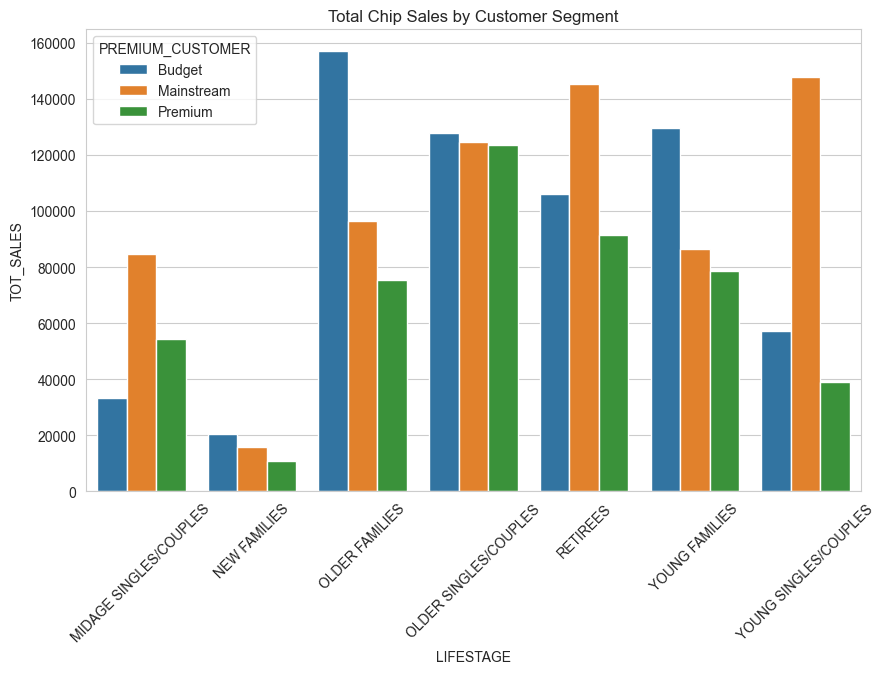

In [19]:
# 11. Visualisations

# Total Sales
sns.barplot(data=sales_segment, x='LIFESTAGE', y='TOT_SALES', hue='PREMIUM_CUSTOMER')
plt.title('Total Chip Sales by Customer Segment')
plt.xticks(rotation=45)
plt.show()

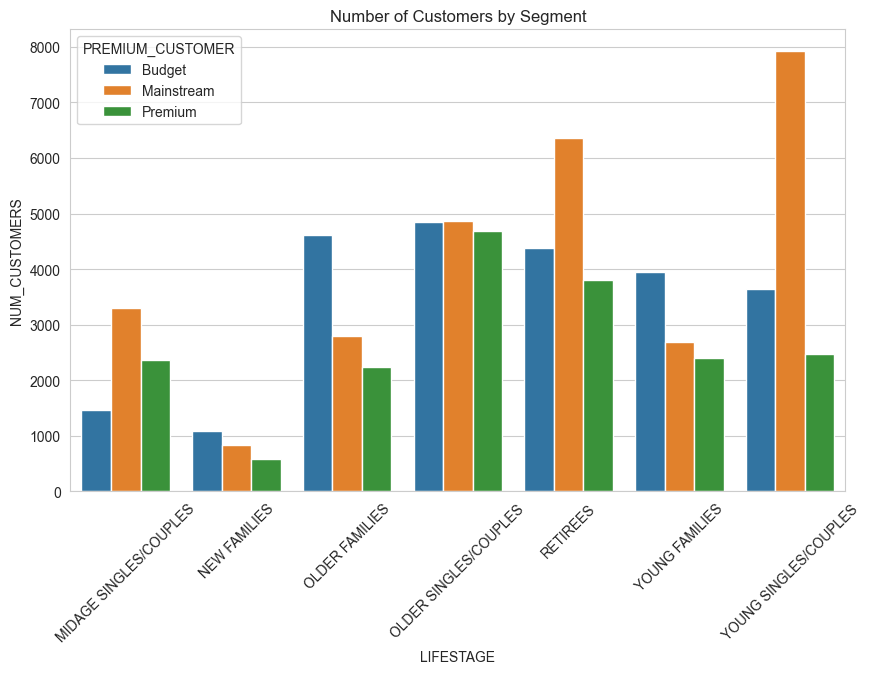

In [20]:
# Number of Customers
sns.barplot(data=customer_count, x='LIFESTAGE', y='NUM_CUSTOMERS', hue='PREMIUM_CUSTOMER')
plt.title('Number of Customers by Segment')
plt.xticks(rotation=45)
plt.show()

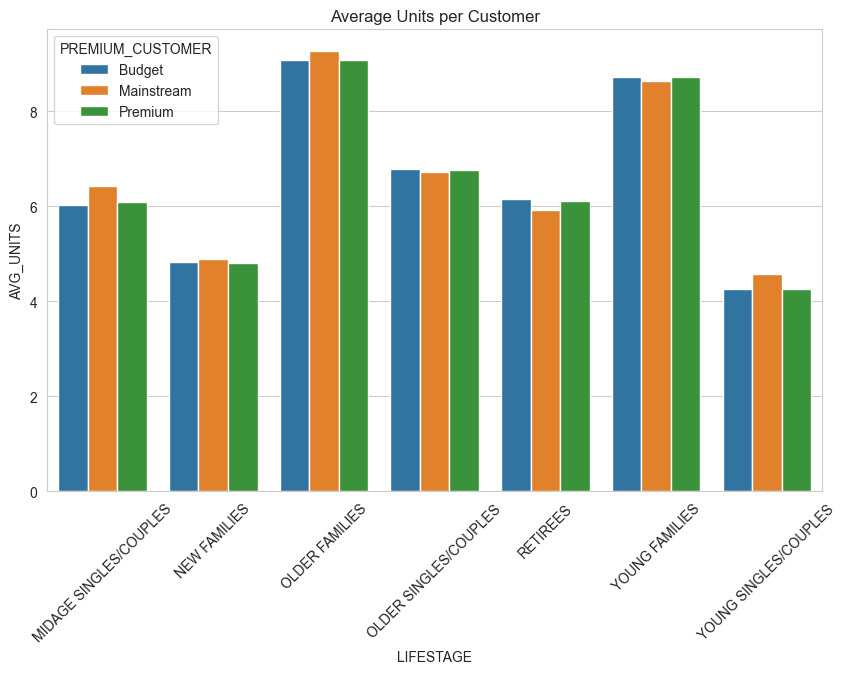

In [21]:
# Avg Units per Customer
sns.barplot(data=units_per_customer, x='LIFESTAGE', y='AVG_UNITS', hue='PREMIUM_CUSTOMER')
plt.title('Average Units per Customer')
plt.xticks(rotation=45)
plt.show()

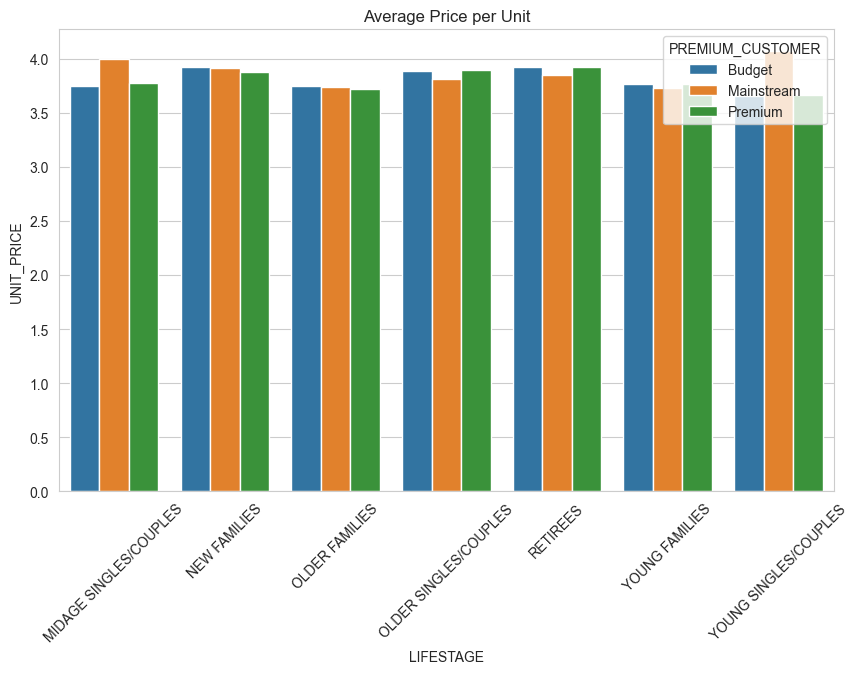

In [22]:
# Avg Price per Unit
sns.barplot(data=avg_price, x='LIFESTAGE', y='UNIT_PRICE', hue='PREMIUM_CUSTOMER')
plt.title('Average Price per Unit')
plt.xticks(rotation=45)
plt.show()

In [23]:
# 12. Deep Dive – Mainstream Young Singles/Couples

target = data[(data['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES') & (data['PREMIUM_CUSTOMER'] == 'Mainstream')]


brand_pref = target['BRAND'].value_counts(normalize=True).head(10)
pack_pref = target['PACK_SIZE'].value_counts(normalize=True).sort_index()


print(brand_pref)
print(pack_pref)

BRAND
KETTLE       0.196684
DORITOS      0.121725
PRINGLES     0.118451
SMITHS       0.098291
THINS        0.059660
INFUZIONS    0.049222
TWISTIES     0.046050
TOSTITOS     0.045538
RRD          0.044771
COBS         0.044208
Name: proportion, dtype: float64
PACK_SIZE
70     0.003223
90     0.006549
110    0.104943
125    0.003019
134    0.118451
135    0.014838
150    0.157593
160    0.006549
165    0.056386
170    0.080587
175    0.255679
180    0.003582
190    0.007573
200    0.009159
210    0.029472
220    0.003172
250    0.014327
270    0.031723
330    0.061144
380     0.03203
Name: proportion, dtype: Float64


In [24]:
# 14. Save Outputs
data.to_csv('QVI_cleaned_data.csv', index=False)